In [83]:
#Loading the Library
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline



import os
import json
import numpy as np 
import pandas as pd
import re
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation

In [39]:
#Loading of Dataset
df = pd.read_csv("C:\\Users\\FelixAdeyanju\\desktop\\Covid19_vaccine.csv")
print(len(df), 'content')

51392 content


In [40]:
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,content,hashtags,source,retweets,favorites,is_retweet
0,1.340000e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08/04/2009 17:52,405,1692,3247,False,20/12/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.340000e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21/09/2009 15:27,834,666,178,False,13/12/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.340000e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25/06/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.340000e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10/09/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.340000e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23/04/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [41]:
#To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                51392 non-null  float64
 1   user_name         51392 non-null  object 
 2   user_location     39703 non-null  object 
 3   user_description  47903 non-null  object 
 4   user_created      51392 non-null  object 
 5   user_followers    51392 non-null  int64  
 6   user_friends      51392 non-null  int64  
 7   user_favourites   51392 non-null  int64  
 8   user_verified     51392 non-null  bool   
 9   date              51392 non-null  object 
 10  content           51392 non-null  object 
 11  hashtags          40307 non-null  object 
 12  source            51276 non-null  object 
 13  retweets          51392 non-null  int64  
 14  favorites         51392 non-null  int64  
 15  is_retweet        51392 non-null  bool   
dtypes: bool(2), float64(1), int64(5), object

In [42]:
#to get the description of the dataset
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,5.139200e+04,5.139200e+04,51392.000000,5.139200e+04,51392.000000,51392.000000
mean,1.368626e+18,9.821734e+04,1317.481087,1.557942e+04,3.111652,13.440886
std,9.952464e+15,8.288480e+05,5790.473165,4.342808e+04,52.019714,198.096124
min,1.340000e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.360000e+18,1.170000e+02,147.000000,3.730000e+02,0.000000,0.000000
50%,1.370000e+18,5.670000e+02,422.000000,2.226000e+03,0.000000,1.000000
75%,1.380000e+18,2.595000e+03,1215.000000,1.155800e+04,1.000000,3.000000
max,1.380000e+18,1.491979e+07,380428.000000,1.205878e+06,7695.000000,22815.000000


In [43]:
#Find the missing value count and Percentate in ascending order
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

,Total,%
user_location,11689,22.7
hashtags,11085,21.6
user_description,3489,6.8
source,116,0.2
id,0,0.0
user_name,0,0.0
user_created,0,0.0
user_followers,0,0.0
user_friends,0,0.0
user_favourites,0,0.0


In [44]:
#Find the missing value count and Percentate
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,content,hashtags,source,retweets,favorites,is_retweet
Total,0,0,11689,3489,0,0,0,0,0,0,0,11085,116,0,0,0
Percent,0.0,0.0,22.744785,6.788994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.569505,0.225716,0.0,0.0,0.0
Types,float64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [45]:
#To get the unit values in each of the column
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,content,hashtags,source,retweets,favorites,is_retweet
Total,51392,51392,39703,47903,51392,51392,51392,51392,51392,51392,51392,40307,51276,51392,51392,51392
Uniques,5,28275,10148,27165,28595,10323,5435,18205,2,37683,51346,18535,184,250,531,1


In [46]:
#to get the most frequent value
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))
most_frequent_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,content,hashtags,source,retweets,favorites,is_retweet
Total,51392,51392,39703,47903,51392,51392,51392,51392,51392,51392,51392,40307,51276,51392,51392,51392
Most frequent item,1370000000000000000.0,Workout Solutions,India,George Tsanis – Workout Solutions Health and F...,20/09/2010 17:01,0,0,0,False,03/03/2021 16:39,@POTUS What about #Covaxin from #Ocugen ?! It ...,['Moderna'],Twitter Web App,0,0,False
Frequence,24173,1223,1391,1223,1223,380,475,741,45917,15,5,2575,16166,34123,21738,51392
Percent from total,47.037,2.38,3.504,2.553,2.38,0.739,0.924,1.442,89.347,0.029,0.01,6.388,31.527,66.397,42.298,100.0


In [47]:
#To vitualise the distribution of the dataset (Number & % of users)
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

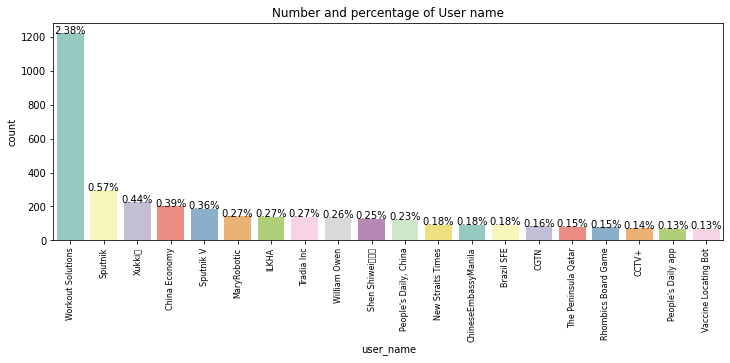

In [48]:
 plot_count("user_name", "User name", df,3)

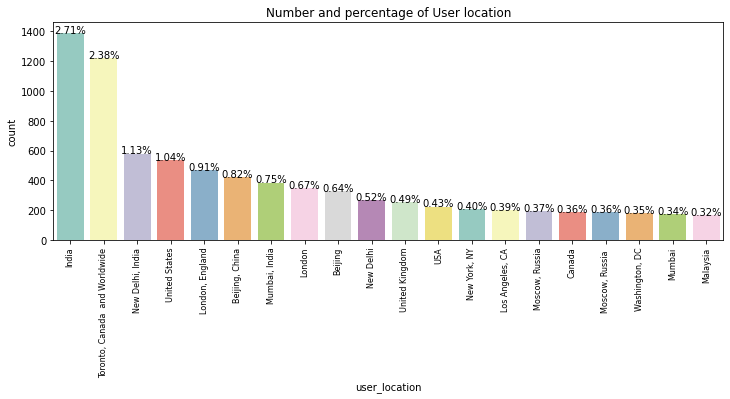

In [49]:
plot_count("user_location", "User location", df,3)

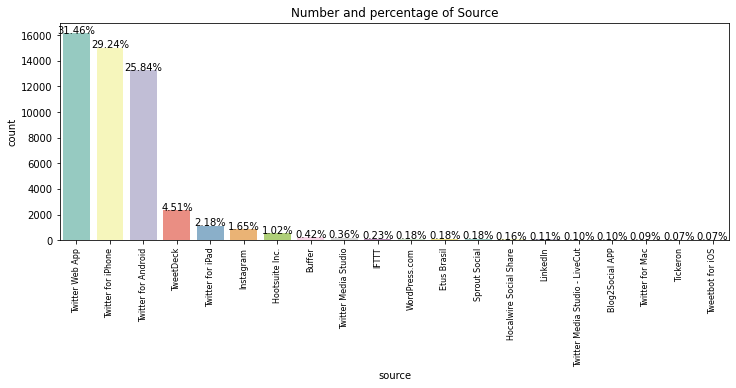

In [50]:
plot_count("source", "Source", df,3)

In [51]:
#to get the prevailing works in the tweet
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=10)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [52]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    content = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(content)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

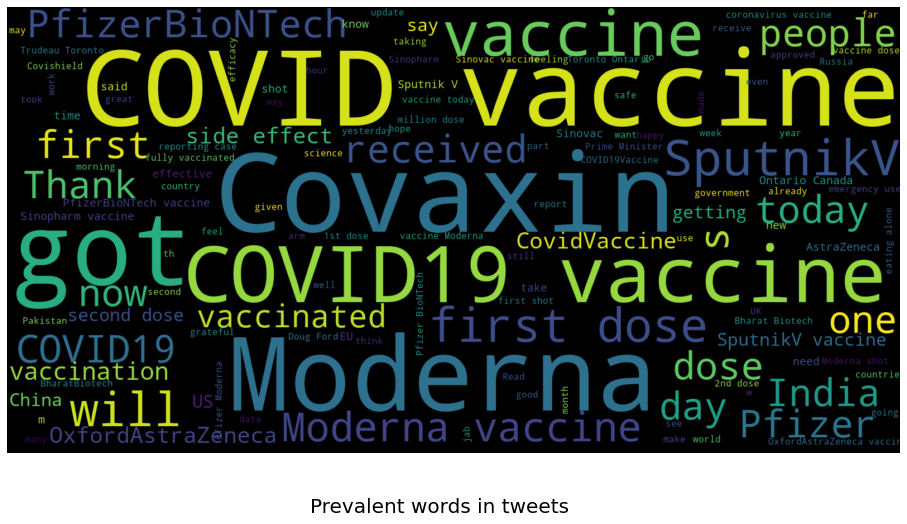

In [53]:
show_wordcloud(df['content'], title = 'Prevalent words in tweets')

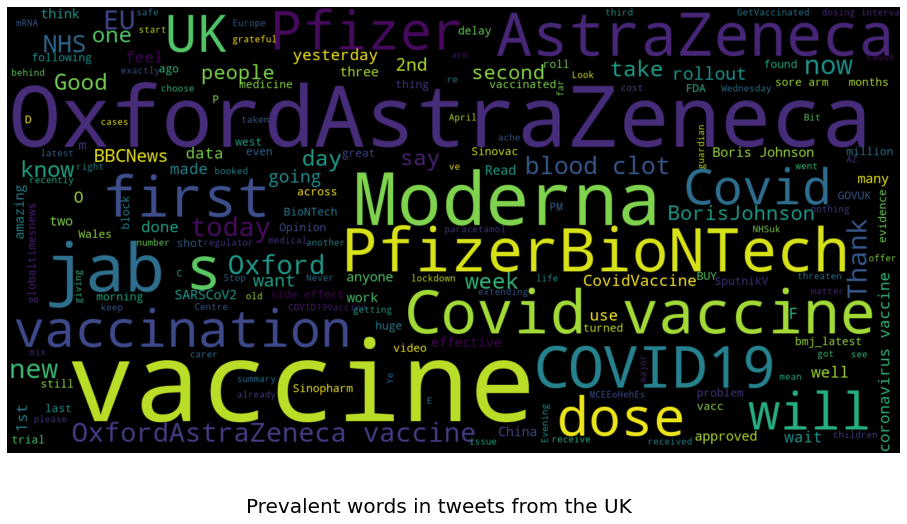

In [54]:
uk_df = df.loc[df.user_location=="United Kingdom"]
show_wordcloud(uk_df['content'], title = 'Prevalent words in tweets from the UK')

In [55]:
#For LDA purpose we focus on tweet content
tweets_df=df.loc[:,['content']]
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  51392 non-null  object
dtypes: object(1)
memory usage: 401.6+ KB


In [56]:
a = 51370
for i in range(a,a+10):
    print(tweets_df.content[i])
    print()

#CNBCTV18Exclusive | Sources say SEC did not consider recommending EUA for #SputnikV Vaccine today

SEC asked DR Re… https://t.co/HT2ycNSbVh

Second donation from #Serbia, consisting of 20,000 doses of the Russian #SputnikV vaccine, arrived in… https://t.co/tSkGf6Cncp

@drharshvardhan @PMOIndia @NITIAayog @MoHFW_INDIA @CDSCO_INDIA_INF when will the decision on sputnik v authorizatio… https://t.co/pXyj25i83a

Yes, someone thought it would be 😅 to do #AprilFools joke re: corona! 
This AM authrties of #Goslar annced vaccinat… https://t.co/I35AzvLVX4

Hashmanis Group of Hospitals is registering people for #SputnikV #CoronaVaccine in #Pakistan 👇

Vaccine Registration https://t.co/SURMioyavM

@ezralevant While America US, Canada, UK &amp; Netherlands impose draconian #lockdowns and wrecking their citizens’ liv… https://t.co/6mNUpO4RfC

#Algeria
#الجزائر  
#الجزاير  
#Algerie
#Coronavirus 
#COVID19 
Coronavirus: Health Minister unveils date of recept… https://t.co/Z8k7mxJR31

#SputnikV: Kenya

In [57]:
# Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

#Remove hashtag and https
data = [re.sub('\d*https\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:2])

['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech ',
 'While the world has been on the wrong side of history this year, hopefully, '
 'the biggest vaccination effort weve ev… ']


In [58]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm', 'pfizerbiontech']]


In [59]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm', 'pfizerbiontech']


In [60]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [61]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [93]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:5])

[['folk', 'say', 'daikon', 'paste', 'treat', 'cytokine', 'storm', 'pfizerbiontech'], ['world', 'wrong', 'side', 'history', 'year', 'hopefully', 'big', 'vaccination', 'effort', 've'], ['coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbiontech', 'moderna', 'covid', '_', 'russian', 'vaccine', 'create', 'last', 'year'], ['fact', 'immutable', 'senator', 'even', 're', 'ethically', 'sturdy', 'enough', 'acknowledge', 'bear'], ['explain', 'need', 'vaccine', 'pfizerbiontech']]


In [63]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]]


In [64]:
id2word[2]

'folk'

In [65]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cytokine', 1),
  ('daikon', 1),
  ('folk', 1),
  ('paste', 1),
  ('pfizerbiontech', 1),
  ('say', 1),
  ('storm', 1),
  ('treat', 1)]]

In [87]:
#To Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [88]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.199*"well" + 0.135*"help" + 0.112*"administer" + 0.053*"test" + '
  '0.050*"pfizervaccine" + 0.033*"agency" + 0.026*"patient" + '
  '0.025*"interesting" + 0.025*"release" + 0.022*"article"'),
 (1,
  '0.253*"day" + 0.182*"good" + 0.129*"news" + 0.092*"corona" + 0.071*"many" + '
  '0.017*"win" + 0.017*"wish" + 0.013*"gov" + 0.002*"last_night" + '
  '0.002*"california"'),
 (2,
  '0.198*"ask" + 0.185*"also" + 0.087*"hear" + 0.050*"suggest" + '
  '0.043*"safety" + 0.020*"woman" + 0.002*"provider" + 0.000*"covaxin" + '
  '0.000*"sec" + 0.000*"india"'),
 (3,
  '0.332*"make" + 0.087*"announce" + 0.081*"next" + 0.032*"american" + '
  '0.022*"weekend" + 0.012*"unfortunately" + 0.011*"trump" + 0.000*"covaxin" + '
  '0.000*"russia" + 0.000*"india"'),
 (4,
  '0.355*"receive" + 0.154*"become" + 0.056*"nurse" + 0.050*"minute" + '
  '0.035*"proud" + 0.016*"later" + 0.000*"covaxin" + 0.000*"russia" + '
  '0.000*"sputnik" + 0.000*"second"'),
 (5,
  '0.372*"moderna" + 0.089*"astrazeneca" + 0.06

In [89]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -19.004823706976428

Coherence Score:  0.42351778409438834


In [69]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.sklearn

In [71]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [37]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

NameError: name 'lda_model' is not defined

In [85]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [92]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [91]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [94]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'